<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_ml/ml03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
file_path = '/content/drive/My Drive/Colab Notebooks/lab_ml/mnist.pickle'
with open(file_path, mode='rb') as f:
    mnist = pickle.load(f)

mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
# 데이터, 레이블 분리
X, y = mnist['data'], mnist['target'].astype(np.int16)
X.shape, y.shape

((70000, 784), (70000,))

In [7]:
# 훈련 셋, 테스트 셋 분리
num_of_train = 60_000
X_train, y_train = X[:num_of_train], y[:num_of_train]
X_test, y_test = X[num_of_train:], y[num_of_train:]
X_train.shape, y_train.shape

((60000, 784), (60000,))

* 다중 클래스 분류
    * 단일 레이블(label) 다중 클래스(class) 분류
        * 예: mnist 숫자 분류, iris 품종 분류
    * 다중 레이블(label) 다중 클래스(class) 분류
        * 예: 사진 분류(이름 & 태그)

In [8]:
# 다중 클래스 분류(Multiclass Classification) 모델 선택
from sklearn.linear_model import SGDClassifier

In [9]:
# 모델 생성
sgd_clf = SGDClassifier(random_state=1)

In [11]:
# 모델 훈련
sgd_clf.fit(X=X_train, y=y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
predictions = sgd_clf.predict(X=X_train)
predictions

array([3, 0, 4, ..., 5, 6, 8], dtype=int16)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int16)

In [14]:
# 다중 클래스 분류에서 예측값을 반환하는 점수:
conf_scores = sgd_clf.decision_function(X=X_train)
conf_scores  #> 2차원 배열

array([[-24670.54831945, -24956.18602024,  -8946.54366192, ...,
        -21540.55134475, -12611.04215094,  -8413.53889667],
       [ 35115.54260117, -29238.15978494, -10522.21560933, ...,
        -20088.61022822,  -8671.69431041,  -8280.94497265],
       [-44963.27137232, -19436.94360558,  -4521.12867711, ...,
         -8694.04566573, -11086.08921073,  -9950.6497012 ],
       ...,
       [-27527.03192197,  -8896.09595732, -13969.34592318, ...,
        -28910.63557095,  -4096.07930681, -14406.76402143],
       [-24472.13816489, -15909.53454174,  -7950.52483362, ...,
        -20823.11099216, -14185.0520895 , -11458.78080004],
       [ -7079.58427496, -27307.02283194, -11328.34979779, ...,
        -18458.33310161,   2158.50975994,   -216.52178007]])

In [15]:
conf_scores.shape  #> (60_000, 10)

(60000, 10)

In [18]:
# 첫번째 훈련 샘플의 점수들 중에서 최댓값의 위치
np.argmax(conf_scores[0])

3

In [20]:
conf_scores[0, 3], conf_scores[0, 5]

(891.7245890640206, 767.8679943592588)

In [22]:
# 모델 평가 지표 - 정확도
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_train, y_pred=predictions)

0.8826833333333334

In [25]:
# 오차(혼동) 행렬
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_train, y_pred=predictions)
conf_mat

array([[5736,    1,   48,    8,   22,   15,   50,    4,   14,   25],
       [   2, 6590,   51,    9,   17,    8,   27,    3,   22,   13],
       [  28,   36, 5531,   48,   90,   17,   91,   19,   64,   34],
       [  67,   36,  365, 5048,   58,  290,   46,   22,   58,  141],
       [   1,   28,   28,    1, 5649,    5,   43,    4,    6,   77],
       [ 101,   20,   97,  168,  266, 4367,  141,   25,   82,  154],
       [  41,    3,   51,    1,   51,   42, 5711,    0,   12,    6],
       [  16,   34,  107,   78,  160,    9,    7, 5525,    9,  320],
       [  53,  155,  423,  125,  322,  212,   82,   16, 3999,  464],
       [  18,   36,   20,   94,  796,   20,    3,  151,    6, 4805]])

In [26]:
# Cross Validation(교차 검증)
from sklearn.model_selection import cross_val_predict

In [27]:
cv_predictions = cross_val_predict(estimator=SGDClassifier(random_state=1),
                                   X=X_train,
                                   y=y_train,
                                   cv=3,
                                   method='predict')
# method='predict': 예측값
# method='decision_function': 예측 점수(confidence scores)
cv_predictions

array([5, 0, 4, ..., 5, 6, 9], dtype=int16)

In [28]:
# 교차 검증에서의 정확도
accuracy_score(y_true=y_train, y_pred=cv_predictions)

0.8683

In [29]:
# 교차 검증에서의 confusion matrix
conf_mat = confusion_matrix(y_true=y_train, y_pred=cv_predictions)
conf_mat

array([[5748,    1,   38,   11,    6,   32,   18,    5,   53,   11],
       [   2, 6438,   51,   39,    7,   47,    7,   13,  117,   21],
       [  77,   70, 5126,  108,   57,   70,   71,   65,  288,   26],
       [  66,   24,  218, 4917,   10,  481,   10,   56,  246,  103],
       [  39,   30,   36,   15, 5149,   93,   31,   27,  128,  294],
       [  88,   16,   65,  127,   45, 4633,   54,   20,  269,  104],
       [  92,   27,  151,    9,   45,  226, 5230,    1,  135,    2],
       [  43,   17,   65,   39,   75,   32,    2, 5547,   58,  387],
       [  74,  122,  128,  231,   52,  606,   36,   37, 4381,  184],
       [  62,   28,   23,   86,  241,  167,    0,  270,  143, 4929]])

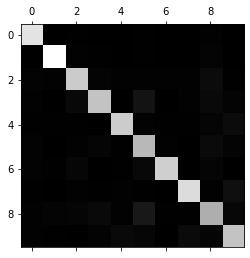

In [32]:
# confusion matrix 시각화
plt.matshow(conf_mat, cmap=plt.cm.gray)
# cmap=plt.cm.binary: 최솟값(흰색) ~ 최댓값(검은색)
# cmap=plt.cm.gray: 최솟값(검은색) ~ 최댓값(흰색)

In [37]:
# 클래스(0, 1, 2, ..., 9)마다 샘플들의 개수가 균일하지 않기 때문에,
# confusion matrix의 수치보다는 각 클래스에서의 비율로 분석을 하는 게 더 낫지 않을까?
A = np.random.randint(0, 10, size=(3, 4))
print(A)
# sum_row = np.sum(A, axis=1).reshape((3,1))
sum_row = np.sum(A, axis=1, keepdims=True)
print(sum_row)
print(A / sum_row)

[[4 3 6 7]
 [9 8 3 0]
 [7 6 4 6]]
[[20]
 [20]
 [23]]
[[0.2        0.15       0.3        0.35      ]
 [0.45       0.4        0.15       0.        ]
 [0.30434783 0.26086957 0.17391304 0.26086957]]


In [38]:
# 각 클래스의 샘플 갯수로 각 셀의 숫자들은 나눈 행렬.
norm_conf_matrix = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
norm_conf_matrix

array([[9.70454162e-01, 1.68833361e-04, 6.41566774e-03, 1.85716698e-03,
        1.01300017e-03, 5.40266757e-03, 3.03900051e-03, 8.44166807e-04,
        8.94816816e-03, 1.85716698e-03],
       [2.96647879e-04, 9.54909522e-01, 7.56452091e-03, 5.78463364e-03,
        1.03826758e-03, 6.97122516e-03, 1.03826758e-03, 1.92821121e-03,
        1.73539009e-02, 3.11480273e-03],
       [1.29237999e-02, 1.17489090e-02, 8.60355824e-01, 1.81268882e-02,
        9.56696878e-03, 1.17489090e-02, 1.19167506e-02, 1.09097012e-02,
        4.83383686e-02, 4.36388050e-03],
       [1.07649649e-02, 3.91453270e-03, 3.55570054e-02, 8.01989887e-01,
        1.63105529e-03, 7.84537596e-02, 1.63105529e-03, 9.13390964e-03,
        4.01239602e-02, 1.67998695e-02],
       [6.67579596e-03, 5.13522766e-03, 6.16227319e-03, 2.56761383e-03,
        8.81376241e-01, 1.59192058e-02, 5.30640192e-03, 4.62170490e-03,
        2.19103047e-02, 5.03252311e-02],
       [1.62331673e-02, 2.95148497e-03, 1.19904077e-02, 2.34274119e-02,
   

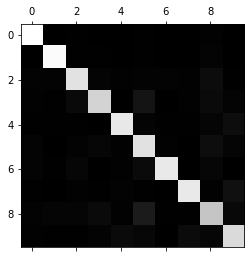

In [40]:
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)

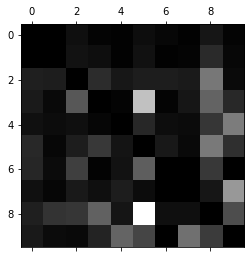

In [41]:
# 대각선의 값들(정답률, TPR)이 너무 커서 다른 셀들이 너무 어둡게 보임.
# 오차 분석에서 대각선은 관심이 없는 부분 -> 대각선을 0으로 채워서 검은색으로 표현
# -> 다른 셀들은 상대적으로 밝게 보임.
np.fill_diagonal(norm_conf_matrix, val=0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)

* sklearn.neighbors.KNeighborsClassifier 클래스 사용
* GridSearchCV에서 weights 파라미터와 n_neighbors 파라미터 조합을 실험
* 훈련 셋에서 정확도(accuracy)가 97% 이상이 되는 kNN 모델을 찾음.
* 최적 모델에서 테스트 셋에서의 정확도를 계산.